# Analysis of Weather at Various Latitudes
#### Kim Price
----
#### A random sample of over 500 cities in the world was gathered.  Weather data for 8/12/2022 was obtained for these cities using the Open Weather Map API.  The data points were analyzed to identify if any correlations exist in the various points of interest and the cities distance from the equator (latitude).

#### Weather Data (points of interest):
* Max Temperature (Degrees F)
* Humidity (%)
* Cloudiness (%)
* Wind Speed (mi/hr)

#### Summary of findings (also shown in file - next to corresponding plots)
* The maximum temperature decreases as you move away from the equator.
    * Evidence:
        * Negative slope on the regresssion line for the northern hemisphere.
        * Positive slope on the regression line for the southern hemisphere.
        * R scores for both northern and southern hemispheres is above .5.
* Humidity is not impacted by distance from the equator. 
    * Evidence:
        * Very small slope on the regresssion line for the northern hemisphere.
        * Very small no slope on the regression line for the southern hemisphere.
        * R scores for both northern and southern hemispheres is well below .5.
* Cloudiness is not impacted by distance from the equator. 
    * Evidence:
        * Very small slope on the regresssion line for the northern hemisphere.
        * Very small no slope on the regression line for the southern hemisphere.
        * R scores for both northern and southern hemispheres is well below .5.
* Wind Speed is not impacted by distance from the equator. 
    * Evidence:
        * Very small slope on the regresssion line for the northern hemisphere.
        * Very small no slope on the regression line for the southern hemisphere.
        * R scores for both northern and southern hemispheres is well below .5.
    
#### Limitiations
* This data is a snapshot in time covering only one day in August.  The data if gathered over a longer timespan or even if taken on a day during a different time of the year, may show different results.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_folder/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(F"{len(cities)} cities found.")

630 cities found.


In [3]:
#Perform API Calls: Perform a weather check on each city using a series of successive API calls

# Set empty lists to hold city informationm
city_name = []
max_temp = []
min_temp = []
humidity = []
clouds = []
wind = []
country = []
lat = []
lng = []
date = []

# Loop through each city and call the API
units = 'Imperial'
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="
i=0
for city in cities:
    
    # Create search query, make request and store in json
    query = url + city
    response = requests.get(query)
    response_json = response.json()
    
    # Try to grab the weather data and append to the lists
    try:
        city_name.append(response_json['name'])
        max_temp.append(response_json['main']['temp_max'])
        min_temp.append(response_json['main']['temp_min'])
        humidity.append(response_json['main']['humidity'])
        clouds.append(response_json['clouds']['all'])
        wind.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        date.append(response_json['dt'])
        
        #Print city found
        i = i+1
        print(f"Processing Record {i}: {city} found! Appending stats")
        
    # Handle exceptions for a city that is not available in the Weather API
    except:
        # Print null values
        print("City not found. Skipping...")
        pass

Processing Record 1: new norfolk found! Appending stats
Processing Record 2: batagay found! Appending stats
Processing Record 3: tattayyangarpettai found! Appending stats
Processing Record 4: bredasdorp found! Appending stats
Processing Record 5: nantucket found! Appending stats
Processing Record 6: byron bay found! Appending stats
Processing Record 7: ureshino found! Appending stats
Processing Record 8: jamestown found! Appending stats
Processing Record 9: butaritari found! Appending stats
Processing Record 10: trollhattan found! Appending stats
Processing Record 11: warrnambool found! Appending stats
Processing Record 12: tiksi found! Appending stats
Processing Record 13: jurado found! Appending stats
Processing Record 14: wenling found! Appending stats
Processing Record 15: port-cartier found! Appending stats
City not found. Skipping...
Processing Record 16: saldanha found! Appending stats
Processing Record 17: khash found! Appending stats
Processing Record 18: hermanus found! Appen

Processing Record 143: bengkulu found! Appending stats
Processing Record 144: yulara found! Appending stats
Processing Record 145: coquimbo found! Appending stats
Processing Record 146: husavik found! Appending stats
Processing Record 147: grindavik found! Appending stats
Processing Record 148: elizabeth city found! Appending stats
Processing Record 149: balykshi found! Appending stats
Processing Record 150: adrar found! Appending stats
Processing Record 151: bichura found! Appending stats
Processing Record 152: touros found! Appending stats
City not found. Skipping...
Processing Record 153: khatanga found! Appending stats
Processing Record 154: praya found! Appending stats
Processing Record 155: carauari found! Appending stats
Processing Record 156: port augusta found! Appending stats
Processing Record 157: cradock found! Appending stats
Processing Record 158: severo-kurilsk found! Appending stats
City not found. Skipping...
Processing Record 159: shakawe found! Appending stats
Proces

Processing Record 285: providencia found! Appending stats
Processing Record 286: onguday found! Appending stats
Processing Record 287: beloha found! Appending stats
Processing Record 288: gazojak found! Appending stats
Processing Record 289: wawa found! Appending stats
Processing Record 290: cabedelo found! Appending stats
Processing Record 291: srandakan found! Appending stats
Processing Record 292: faanui found! Appending stats
Processing Record 293: upernavik found! Appending stats
Processing Record 294: ketchikan found! Appending stats
Processing Record 295: gambiran found! Appending stats
Processing Record 296: baykit found! Appending stats
Processing Record 297: agvali found! Appending stats
Processing Record 298: tabou found! Appending stats
Processing Record 299: bayan found! Appending stats
City not found. Skipping...
Processing Record 300: thunder bay found! Appending stats
Processing Record 301: tutoia found! Appending stats
Processing Record 302: axim found! Appending stats

Processing Record 429: energetik found! Appending stats
City not found. Skipping...
Processing Record 430: zile found! Appending stats
Processing Record 431: aginskoye found! Appending stats
Processing Record 432: san andres found! Appending stats
Processing Record 433: chake chake found! Appending stats
City not found. Skipping...
Processing Record 434: kamnik found! Appending stats
Processing Record 435: sangar found! Appending stats
Processing Record 436: sungaipenuh found! Appending stats
Processing Record 437: kuah found! Appending stats
Processing Record 438: linxia found! Appending stats
City not found. Skipping...
Processing Record 439: yining found! Appending stats
Processing Record 440: wasilla found! Appending stats
Processing Record 441: algeciras found! Appending stats
Processing Record 442: tessalit found! Appending stats
Processing Record 443: jackson found! Appending stats
Processing Record 444: ust-uda found! Appending stats
Processing Record 445: orange cove found! Ap

Processing Record 570: kamina found! Appending stats
Processing Record 571: jiuquan found! Appending stats
Processing Record 572: tashara found! Appending stats
Processing Record 573: meget found! Appending stats
Processing Record 574: hamilton found! Appending stats
Processing Record 575: nouadhibou found! Appending stats


In [4]:
#Convert Raw Data to DataFrame

# Create DataFrame
city_weather = pd.DataFrame({
    'City': city_name,
    'Lat': lat,
    'Lng': lng,
    'Min_Temp': min_temp,
    'Max_Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind_Speed': wind,
    'Country': country,
    'Date': date
})

#Eport city weather dataframe to output csv file
city_weather.to_csv(output_data_file, index=False, header=True)

#Display the Dataframe
city_weather.head(5)

,City,Lat,Lng,Min_Temp,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,53.10,56.71,78,98,1.41,AU,1660363485
1,Batagay,67.6333,134.6333,59.18,59.18,54,80,10.92,RU,1660363485
2,Tāttayyangārpettai,11.1333,78.4500,85.35,85.35,56,83,8.05,IN,1660363486
3,Bredasdorp,-34.5322,20.0403,43.30,43.30,86,54,4.70,ZA,1660363487
4,Nantucket,41.2835,-70.0995,66.02,67.14,45,99,6.85,US,1660363487


In [5]:
city_weather.describe()

,Lat,Lng,Min_Temp,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,20.298846,19.004951,67.364643,68.204052,72.177391,57.530435,7.537930,1.660364e+09
std,33.333335,89.292509,13.005801,13.029727,18.648589,38.649168,5.281838,8.717824e+01
min,-54.800000,-175.200000,30.360000,30.360000,1.000000,0.000000,0.000000,1.660363e+09
25%,-7.657650,-64.439100,57.200000,58.315000,62.000000,20.000000,3.560000,1.660364e+09
50%,22.678300,25.950000,68.140000,69.210000,76.000000,68.000000,6.040000,1.660364e+09
75%,49.316850,96.785000,77.540000,79.040000,85.500000,99.000000,10.585000,1.660364e+09
max,78.218600,179.316700,101.570000,101.570000,100.000000,100.000000,28.900000,1.660364e+09


## Latitude vs. Temperature Plot
#### This plot is analyzing the max temperatures at different lattitudes using a random sample of over 500 cities.  We attempting to visualize any correlations between distance from the equator and temperature.

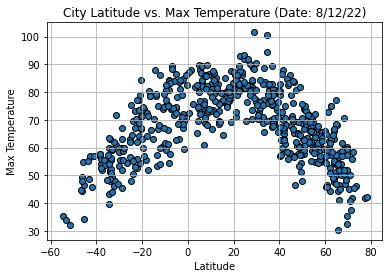

In [6]:
# Create a Scatter Plot for temperature vs latitude
x_values = city_weather['Lat']
y_values = city_weather['Max_Temp']
plt.scatter(x_values,y_values, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Max Temperature (Date: 8/12/22)')
plt.grid()

# Save the figure
plt.savefig("output_folder/Lat_MaxTemp_Plot.png")

#show the plot
plt.show()

## Latitude vs. Humidity Plot
#### This plot is analyzing the humidity (%) at different lattitudes using a random sample of over 500 cities.  We attempting to visualize any correlations between distance from the equator and humidity (%).

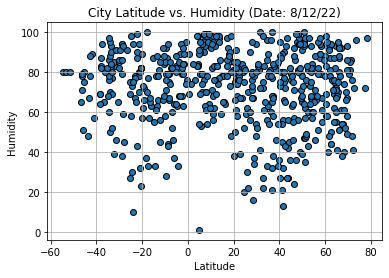

In [7]:
# Create a Scatter Plot for temperature vs latitude
x_values = city_weather['Lat']
y_values = city_weather['Humidity']
plt.scatter(x_values,y_values, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (Date: 8/12/22)')
plt.grid()

# Save the figure
plt.savefig("output_folder/Lat_Humidity_Plot.png")

#show the plot
plt.show()

## Latitude vs. Cloudiness Plot
#### This plot is analyzing the cloudiness at different lattitudes using a random sample of over 500 cities. We attempting to visualize any correlations between distance from the equator and cloudiness.

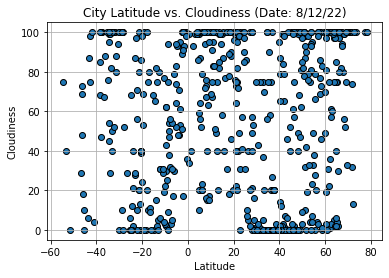

In [8]:
# Create a Scatter Plot for temperature vs latitude
x_values = city_weather['Lat']
y_values = city_weather['Cloudiness']
plt.scatter(x_values,y_values, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (Date: 8/12/22)')
plt.grid()

# Save the figure
plt.savefig("output_folder/Lat_Cloudiness_Plot.png")

#show the plot
plt.show()

## Latitude vs. Wind Speed Plot
#### This plot is analyzing the wind speed at different lattitudes using a random sample of over 500 cities. We attempting to visualize any correlations between distance from the equator and wind speed.

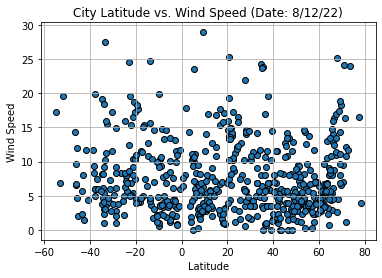

In [9]:
# Create a Scatter Plot for temperature vs latitude
x_values = city_weather['Lat']
y_values = city_weather['Wind_Speed']
plt.scatter(x_values,y_values, edgecolors= "black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (Date: 8/12/22)')
plt.grid()

# Save the figure
plt.savefig("output_folder/Lat_WindSpeed_Plot.png")

#show the plot
plt.show()

## Linear Regression

In [10]:
#Create Dataframes for Northern and Southern Hemispheres
north_data = city_weather.loc[city_weather['Lat']>0]
south_data = city_weather.loc[city_weather['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.536391605804963


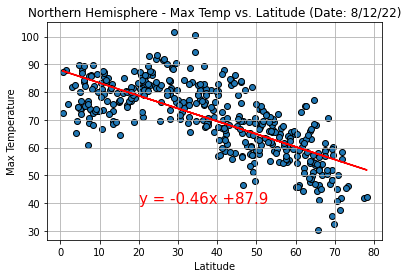

In [11]:
# Assign X and Y values for plot
x_values = north_data['Lat']
y_values = north_data['Max_Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude (Date: 8/12/22)')
plt.grid()

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_folder/North_Lat_MaxTemp_Reg.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5576095895992959


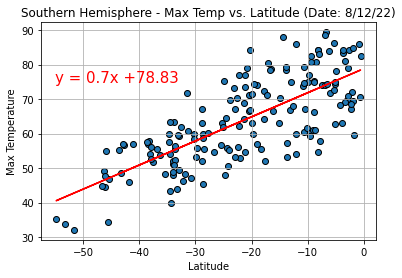

In [12]:
# Assign X and Y values for plot
x_values = south_data['Lat']
y_values = south_data['Max_Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-55,75),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude (Date: 8/12/22)')
plt.grid()

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_folder/South_Lat_MaxTemp_Reg.png")

# Show plot
plt.show()

## Northern and Southern Hemisphere: Max Temp vs. Latitude
#### Analysis: Linear regression to identify correlation in max temp vs. latitude in both the northern and southern hemispheres
#### Findings: The linear regression analysis shows a correlation in the temperature and distance from the equator.  As the lines indicate, the temperature decreases as you move away from the equator.  This is evidenced by the negative slope on the regresssion line for the northern hemisphere and the positive slope on the regression line for the southern hemisphere - coupled with the the r scores both being above .5.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.011373300224651437


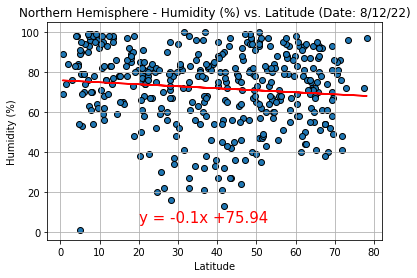

In [13]:
# Assign X and Y values for plot
x_values = north_data['Lat']
y_values = north_data['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude (Date: 8/12/22)')
plt.grid()

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_folder/North_Lat_Humidity_Reg.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0018841026885716332


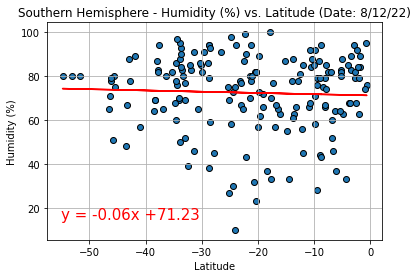

In [14]:
# Assign X and Y values for plot
x_values = south_data['Lat']
y_values = south_data['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude (Date: 8/12/22)')
plt.grid()

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_folder/South_Lat_Humidity_Reg.png")

# Show plot
plt.show()

## Northern and Southern Hemisphere: Humidity (%) vs. Latitude
#### Analysis: Linear regression to identify correlation in humidity vs. latitude in both the northern and southern hemispheres
#### Findings: The linear regression analysis shows no correlation in the humidity and distance from the equator.  As the lines indicate, the humidity doesn't seem to be impacted as you move away from the equator.  This is evidenced by very small slope on both lines - coupled with the the r scores both being well below .5.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 1.3705519238671936e-06


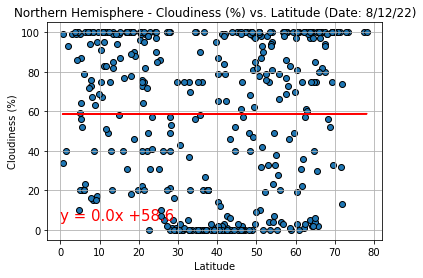

In [15]:
# Assign X and Y values for plot
x_values = north_data['Lat']
y_values = north_data['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude (Date: 8/12/22)')
plt.grid()

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_folder/North_Lat_Cloudiness_Reg.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.013141270296997605


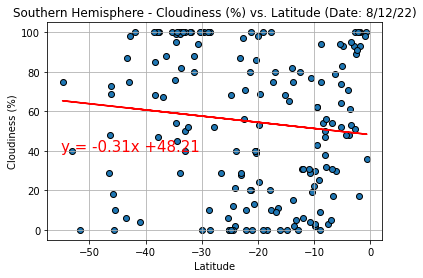

In [16]:
# Assign X and Y values for plot
x_values = south_data['Lat']
y_values = south_data['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude (Date: 8/12/22)')
plt.grid()

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_folder/South_Lat_Cloudiness_Reg.png")

# Show plot
plt.show()

## Northern and Southern Hemisphere:  Cloudiness (%) vs. Latitude
#### Analysis: Linear regression to identify correlation in cloudiness vs. latitude in both the northern and southern hemispheres
#### Findings: The linear regression analysis shows no correlation in the cloudiness and distance from the equator.  As the lines indicate, the cloudiness doesn't seem to be impacted as you move away from the equator.  This is evidenced by very small slope on both lines - coupled with the the r scores both being well below .5.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 2.13426445726929e-07


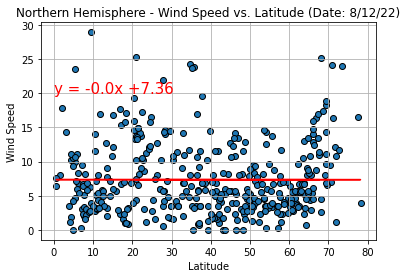

In [17]:
# Assign X and Y values for plot
x_values = north_data['Lat']
y_values = north_data['Wind_Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude (Date: 8/12/22)')
plt.grid()

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_folder/North_Lat_WindSpeed_Reg.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02223924172678707


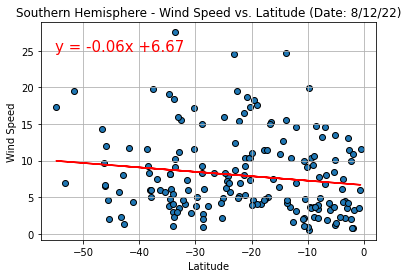

In [18]:
# Assign X and Y values for plot
x_values = south_data['Lat']
y_values = south_data['Wind_Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values, edgecolors= "black")
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude (Date: 8/12/22)')
plt.grid()

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("output_folder/South_Lat_WindSpeed_Reg.png")

# Show plot
plt.show()

## Northern and Southern Hemisphere analysis - Wind Speed (mph) vs. Latitude Linear Regression
#### Analysis: Linear regression to identify correlation in wind speed vs. latitude in both the northern and southern hemispheres
#### Findings: The linear regression analysis shows no correlation in the wind speed and distance from the equator.  As the lines indicate, the wind speed doesn't seem to be impacted as you move away from the equator.  This is evidenced by very small slope on both lines - coupled with the the r scores both being well below .5.